In [55]:
import pandas as pd
from sklearn import linear_model, preprocessing, model_selection, ensemble, tree
import matplotlib.pyplot as plt

def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1

    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

In [41]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#先看看预测的目标是怎么的分布比例
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [6]:
#男性比例更低
train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [7]:
train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [8]:
train['Child'] = 0
train.loc[train['Age']<18, 'Child'] = 1

In [10]:
train['Survived'][train['Child'] == 1].value_counts(normalize=True)

1    0.539823
0    0.460177
Name: Survived, dtype: float64

In [14]:
train['Hyp'] = 0
train.loc[train['Sex'] == 'female', 'Hyp'] = 1
train['Result'] = 0
train.loc[train['Hyp'] == train['Survived'], 'Result'] = 1
train['Result'].value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
clean_data(train)
clean_data(test)

In [17]:
train.shape

(891, 14)

In [18]:
target = train["Survived"].values
features = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

logistic = linear_model.LogisticRegression()
logistic.fit(features, target)

logistic.score(features, target)

0.7991021324354658

In [24]:
scores = model_selection.cross_val_score(logistic, features, target, scoring='accuracy', cv=10)
scores

array([ 0.77777778,  0.78888889,  0.7752809 ,  0.83146067,  0.78651685,
        0.7752809 ,  0.78651685,  0.7752809 ,  0.82022472,  0.81818182])

In [25]:
scores.mean()

0.7935410282601294

In [26]:
poly = preprocessing.PolynomialFeatures(degree=2)
features_ = poly.fit_transform(features)

In [27]:
clf = linear_model.LogisticRegression(C=10)
clf.fit(features_, target)
clf.score(features_, target)

0.83613916947250277

In [29]:
gbm = ensemble.GradientBoostingClassifier(learning_rate=0.005, min_samples_split=40, min_samples_leaf=1, max_features=2, max_depth=12, n_estimators=1500,subsample=0.75)

In [30]:
gbm = gbm.fit(features, target)

In [31]:
gbm.score(features, target)

0.94388327721661058

In [33]:
decision_tree = tree.DecisionTreeClassifier(random_state=1)

In [38]:
decision_tree = decision_tree.fit(features, target)

In [39]:
decision_tree.score(features, target)

0.97979797979797978

In [43]:
decision_tree_two = tree.DecisionTreeClassifier(max_depth=7, min_samples_split=2, random_state=1)

In [44]:
decision_tree_two = decision_tree_two.fit(features, target)

In [45]:
decision_tree_two.feature_importances_

array([ 0.16289604,  0.13683043,  0.47976487,  0.14661755,  0.04973834,
        0.01414005,  0.01001273])

In [46]:
decision_tree_two.score(features, target)

0.87878787878787878

In [51]:
clean_data(train)
target = train["Survived"].values
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values


In [47]:
forest = ensemble.RandomForestClassifier(max_depth=7, min_samples_split=1, n_estimators=1000, random_state=1, n_jobs=-1)

In [52]:
forest = forest.fit(features_forest, target)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
D:\ProgramData\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
D:\ProgramData\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000000000289BB70, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000000000289BB70, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'forest = forest.fit(features_forest, target)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 31, 16, 13, 28, 787227, tzinfo=datetime.timezone.utc), 'msg_id': '34C9131699BC40C092A0876E5E858277', 'msg_type': 'execute_request', 'session': 'D0533FA1D46646AF85A29F865458A17E', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '34C9131699BC40C092A0876E5E858277', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'D0533FA1D46646AF85A29F865458A17E']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'forest = forest.fit(features_forest, target)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 31, 16, 13, 28, 787227, tzinfo=datetime.timezone.utc), 'msg_id': '34C9131699BC40C092A0876E5E858277', 'msg_type': 'execute_request', 'session': 'D0533FA1D46646AF85A29F865458A17E', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '34C9131699BC40C092A0876E5E858277', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'D0533FA1D46646AF85A29F865458A17E'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'forest = forest.fit(features_forest, target)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 31, 16, 13, 28, 787227, tzinfo=datetime.timezone.utc), 'msg_id': '34C9131699BC40C092A0876E5E858277', 'msg_type': 'execute_request', 'session': 'D0533FA1D46646AF85A29F865458A17E', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '34C9131699BC40C092A0876E5E858277', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='forest = forest.fit(features_forest, target)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'forest = forest.fit(features_forest, target)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('forest = forest.fit(features_forest, target)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('forest = forest.fit(features_forest, target)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='forest = forest.fit(features_forest, target)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>], cell_name='<ipython-input-52-6400aa641470>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1aaabeb8, execution_c..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000000196838A0, file "<ipython-input-52-6400aa641470>", line 1>
        result = <ExecutionResult object at 1aaabeb8, execution_c..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000000196838A0, file "<ipython-input-52-6400aa641470>", line 1>, result=<ExecutionResult object at 1aaabeb8, execution_c..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000000196838A0, file "<ipython-input-52-6400aa641470>", line 1>
        self.user_global_ns = {'In': ['', 'import pandas as pd\nfrom sklearn import linear_model', "train = pd.read_csv('data/train.csv')", 'train.info()', "train['Survived'].value_counts(normalize=True)", "train['Survived'][train['Sex' == 'male']].value_counts(normalize=True)", "train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)", "train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)", "train['Child'] = 0\ntrain.loc[train['Age']<18, 'Child'] = 1", "train['Survived'][train['Child'] == 1].value_counts(normlize=True)", "train['Survived'][train['Child'] == 1].value_counts(normalize=True)", "train = pd.read_csv('data/train.csv')\ntest = pd.read_csv('data/test.csv')", "train['Hyp'] = 0\ntrain.loc[train['Sex'] == 'fema... = 1\ntrain['Result'].value_counts(normalize=True)", "train['Hyp'] = 0\ntrain.loc[train['Sex'] == 'fema... = 1\ntrain['Result'].value_counts(normalize=True)", "train['Hyp'] = 0\ntrain.loc[train['Sex'] == 'fema... = 1\ntrain['Result'].value_counts(normalize=True)", 'import pandas as pd\nfrom sklearn import linear_m...data.loc[data["Embarked"] == "Q", "Embarked"] = 2', 'clean_data(train)\nclean_data(test)', 'train.shape', 'target = train["Survived"].values\nfeatures = tra...atures, target)\n\nlogistic.score(features, target)', 'import pandas as pd\nfrom sklearn import linear_m...data.loc[data["Embarked"] == "Q", "Embarked"] = 2', ...], 'Out': {4: 0    0.616162
1    0.383838
Name: Survived, dtype: float64, 6: 0    0.811092
1    0.188908
Name: Survived, dtype: float64, 7: 1    0.742038
0    0.257962
Name: Survived, dtype: float64, 10: 1    0.539823
0    0.460177
Name: Survived, dtype: float64, 13: 1    1.0
Name: Result, dtype: float64, 14: 1    0.786756
0    0.213244
Name: Result, dtype: float64, 17: (891, 14), 18: 0.7991021324354658, 21: array([ 0.77777778,  0.78888889,  0.7752809 ,  0...78651685,  0.7752809 ,  0.82022472,  0.81818182]), 23: array([ 0.77777778,  0.78888889,  0.7752809 ,  0...78651685,  0.7752809 ,  0.82022472,  0.81818182]), ...}, '_': 0.87878787878787878, '_10': 1    0.539823
0    0.460177
Name: Survived, dtype: float64, '_13': 1    1.0
Name: Result, dtype: float64, '_14': 1    0.786756
0    0.213244
Name: Result, dtype: float64, '_17': (891, 14), '_18': 0.7991021324354658, '_21': array([ 0.77777778,  0.78888889,  0.7752809 ,  0...78651685,  0.7752809 ,  0.82022472,  0.81818182]), '_23': array([ 0.77777778,  0.78888889,  0.7752809 ,  0...78651685,  0.7752809 ,  0.82022472,  0.81818182]), ...}
        self.user_ns = {'In': ['', 'import pandas as pd\nfrom sklearn import linear_model', "train = pd.read_csv('data/train.csv')", 'train.info()', "train['Survived'].value_counts(normalize=True)", "train['Survived'][train['Sex' == 'male']].value_counts(normalize=True)", "train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)", "train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)", "train['Child'] = 0\ntrain.loc[train['Age']<18, 'Child'] = 1", "train['Survived'][train['Child'] == 1].value_counts(normlize=True)", "train['Survived'][train['Child'] == 1].value_counts(normalize=True)", "train = pd.read_csv('data/train.csv')\ntest = pd.read_csv('data/test.csv')", "train['Hyp'] = 0\ntrain.loc[train['Sex'] == 'fema... = 1\ntrain['Result'].value_counts(normalize=True)", "train['Hyp'] = 0\ntrain.loc[train['Sex'] == 'fema... = 1\ntrain['Result'].value_counts(normalize=True)", "train['Hyp'] = 0\ntrain.loc[train['Sex'] == 'fema... = 1\ntrain['Result'].value_counts(normalize=True)", 'import pandas as pd\nfrom sklearn import linear_m...data.loc[data["Embarked"] == "Q", "Embarked"] = 2', 'clean_data(train)\nclean_data(test)', 'train.shape', 'target = train["Survived"].values\nfeatures = tra...atures, target)\n\nlogistic.score(features, target)', 'import pandas as pd\nfrom sklearn import linear_m...data.loc[data["Embarked"] == "Q", "Embarked"] = 2', ...], 'Out': {4: 0    0.616162
1    0.383838
Name: Survived, dtype: float64, 6: 0    0.811092
1    0.188908
Name: Survived, dtype: float64, 7: 1    0.742038
0    0.257962
Name: Survived, dtype: float64, 10: 1    0.539823
0    0.460177
Name: Survived, dtype: float64, 13: 1    1.0
Name: Result, dtype: float64, 14: 1    0.786756
0    0.213244
Name: Result, dtype: float64, 17: (891, 14), 18: 0.7991021324354658, 21: array([ 0.77777778,  0.78888889,  0.7752809 ,  0...78651685,  0.7752809 ,  0.82022472,  0.81818182]), 23: array([ 0.77777778,  0.78888889,  0.7752809 ,  0...78651685,  0.7752809 ,  0.82022472,  0.81818182]), ...}, '_': 0.87878787878787878, '_10': 1    0.539823
0    0.460177
Name: Survived, dtype: float64, '_13': 1    1.0
Name: Result, dtype: float64, '_14': 1    0.786756
0    0.213244
Name: Result, dtype: float64, '_17': (891, 14), '_18': 0.7991021324354658, '_21': array([ 0.77777778,  0.78888889,  0.7752809 ,  0...78651685,  0.7752809 ,  0.82022472,  0.81818182]), '_23': array([ 0.77777778,  0.78888889,  0.7752809 ,  0...78651685,  0.7752809 ,  0.82022472,  0.81818182]), ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
d:\project\ml\python\start-ml\kaggle\titanic\<ipython-input-52-6400aa641470> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 forest = forest.fit(features_forest, target)
      7 
      8 
      9 
     10 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...state=1,
            verbose=0, warm_start=False), X=array([[  3.,  22.,   0., ...,   1.,   0.,   0.]...2.,   0., ...,   0.,   0.,   2.]], dtype=float32), y=array([[ 0.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 1.],
       [ 0.]]), sample_weight=None)
    321             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    322                              backend="threading")(
    323                 delayed(_parallel_build_trees)(
    324                     t, self, X, y, sample_weight, i, len(trees),
    325                     verbose=self.verbose, class_weight=self.class_weight)
--> 326                 for i, t in enumerate(trees))
        i = 999
    327 
    328             # Collect newly grown trees
    329             self.estimators_.extend(trees)
    330 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Jan  1 00:13:29 2018
PID: 8340                 Python 3.6.1: D:\ProgramData\Anaconda3\python.exe
...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1791095845, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...state=1,
            verbose=0, warm_start=False), array([[  3.,  22.,   0., ...,   1.,   0.,   0.]...2.,   0., ...,   0.,   0.,   2.]], dtype=float32), array([[ 0.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 1.],
       [ 0.]]), None, 0, 1000), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1791095845, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...state=1,
            verbose=0, warm_start=False), array([[  3.,  22.,   0., ...,   1.,   0.,   0.]...2.,   0., ...,   0.,   0.,   2.]], dtype=float32), array([[ 0.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 1.],
       [ 0.]]), None, 0, 1000)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1791095845, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...state=1,
            verbose=0, warm_start=False), X=array([[  3.,  22.,   0., ...,   1.,   0.,   0.]...2.,   0., ...,   0.,   0.,   2.]], dtype=float32), y=array([[ 0.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 1.],
       [ 0.]]), sample_weight=None, tree_idx=0, n_trees=1000, verbose=0, class_weight=None)
    115                 warnings.simplefilter('ignore', DeprecationWarning)
    116                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    117         elif class_weight == 'balanced_subsample':
    118             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    119 
--> 120         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...False, random_state=1791095845, splitter='best')>
        X = array([[  3.,  22.,   0., ...,   1.,   0.,   0.]...2.,   0., ...,   0.,   0.,   2.]], dtype=float32)
        y = array([[ 0.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 1.],
       [ 0.]])
        sample_weight = None
        curr_sample_weight = array([ 2.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  ...,  1.,
        1.,  3.,  0.,  0.,  1.,  1.,  0.])
    121     else:
    122         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    123 
    124     return tree

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1791095845, splitter='best'), X=array([[  3.,  22.,   0., ...,   1.,   0.,   0.]...2.,   0., ...,   0.,   0.,   2.]], dtype=float32), y=array([[ 0.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 1.],
       [ 0.]]), sample_weight=array([ 2.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  ...,  1.,
        1.,  3.,  0.,  0.,  1.,  1.,  0.]), check_input=False, X_idx_sorted=None)
    734 
    735         super(DecisionTreeClassifier, self).fit(
    736             X, y,
    737             sample_weight=sample_weight,
    738             check_input=check_input,
--> 739             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    740         return self
    741 
    742 
    743     def predict_proba(self, X, check_input=True):

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1791095845, splitter='best'), X=array([[  3.,  22.,   0., ...,   1.,   0.,   0.]...2.,   0., ...,   0.,   0.,   2.]], dtype=float32), y=array([[ 0.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 1.],
       [ 0.]]), sample_weight=array([ 2.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  ...,  1.,
        1.,  3.,  0.,  0.,  1.,  1.,  0.]), check_input=False, X_idx_sorted=None)
    194 
    195         if isinstance(self.min_samples_split, (numbers.Integral, np.integer)):
    196             if not 2 <= self.min_samples_split:
    197                 raise ValueError("min_samples_split must be at least 2 "
    198                                  "or in (0, 1], got %s"
--> 199                                  % self.min_samples_split)
        self.min_samples_split = 1
    200             min_samples_split = self.min_samples_split
    201         else:  # float
    202             if not 0. < self.min_samples_split <= 1.:
    203                 raise ValueError("min_samples_split must be at least 2 "

ValueError: min_samples_split must be at least 2 or in (0, 1], got 1
___________________________________________________________________________

In [56]:
fig = plt.figure(figsize=(18,6))

In [59]:
%matplotlib inline

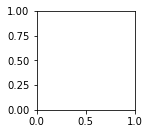

In [60]:
plt.subplot2grid((2,3), (0,0))


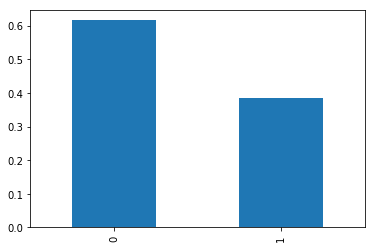

In [61]:
train.Survived.value_counts(normalize=True).plot(kind='bar')